A primitive Classifier not working well

In [13]:
import numpy as np
import h5py
    
    
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [14]:


import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage


%matplotlib inline



In [15]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

(50,)


In [9]:
test_set_y.shape[0]

1

y = 0, it's a 'non-cat' picture.


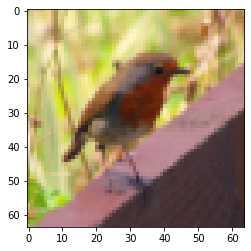

In [16]:
index =10
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[0, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [ ]:
train_set_y.shape


(1, 209)

In [18]:
m_train = train_set_x_orig.shape[0]
m_test =  test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [19]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[1]*train_set_x_orig.shape[2]*train_set_x_orig.shape[3],train_set_x_orig.shape[0])
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[1]*test_set_x_orig.shape[2]*test_set_x_orig.shape[3],test_set_x_orig.shape[0])


In [20]:
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 71 49 38 70]


In [21]:


train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.





Common steps for pre-processing a new dataset are:

    Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
    Reshape the datasets such that each example is now a vector of size (num_px * num_px * 3, 1)
    "Standardize" the data



In [22]:
def sigmoid(z):
    
    
    s = 1/(1+np.exp(-z))
    
    
    return s

In [23]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [24]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [25]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [26]:
def propagate(w, b, X, Y):
  m = X.shape[1]
  A = sigmoid(np.dot(w.T,X) + b)              # compute activation
  cost = np.sum(((- np.log(A))*Y + (-np.log(1-A))*(1-Y)))/m  # compute cost
  dw = (np.dot(X,(A-Y).T))/m
  db = (np.sum(A-Y))/m
  assert(dw.shape == w.shape)
  assert(db.dtype == float)
  cost = np.squeeze(cost)
  assert(cost.shape == ())
  grads = {"dw": dw,
             "db": db}
    
  return grads, cost

In [27]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [28]:
X.shape

(2, 3)

In [29]:
X

array([[ 1. ,  2. , -1. ],
       [ 3. ,  4. , -3.2]])

In [30]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
 
  costs = []
    
  for i in range(num_iterations):
        
        
        
        grads, cost = propagate(w, b, X, Y)
        
        
        dw = grads["dw"]
        db = grads["db"]
        
       
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
      
        if i % 100 == 0:
            costs.append(cost)
        
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
  params = {"w": w,
              "b": b}
    
  grads = {"dw": dw,
             "db": db}
    
  return params, grads, costs

In [31]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))



w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


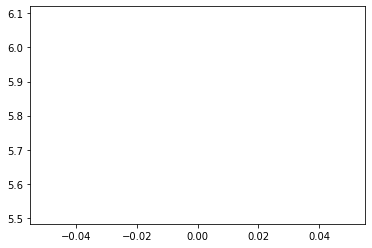

In [32]:


import matplotlib.pyplot as plt
plt.plot(costs,'r-')



In [33]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T,X) + b) 
     #### WORKING SOLUTION 1: USING IF ELSE #### 
    #for i in range(A.shape[1]):
        ## Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        #if (A[0,i] >= 0.5):
        #    Y_prediction[0, i] = 1
        #else:
        #    Y_prediction[0, i] = 0
        
        
    #### WORKING SOLUTION 2: ONE LINE ####
    #for i in range(A.shape[1]):
        ## Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        #Y_prediction[0, i] = 1 if A[0,i] >=0.5 else 0
         
    Y_prediction = (A >= 0.5) *1
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [34]:


w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))



predictions = [[1 1 0]]


In [35]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
  w, b = initialize_with_zeros(X_train.shape[0])
  parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
  w = parameters["w"]
  b = parameters["b"]
  Y_prediction_test = predict(w, b, X_test)
  Y_prediction_train = predict(w, b, X_train)
  print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
  d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
  return d

In [36]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = False)

train accuracy: 91.38755980861244 %
test accuracy: 34.0 %


y = 1, you predicted that it is a "non-cat" picture.


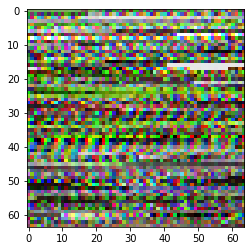

In [37]:
index = 25
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[d["Y_prediction_test"][0,index]].decode("utf-8") +  "\" picture.")

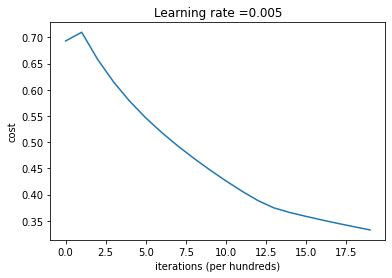

In [38]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [39]:
c = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 10000, learning_rate = 0.005, print_cost = False)

train accuracy: 100.0 %
test accuracy: 34.0 %


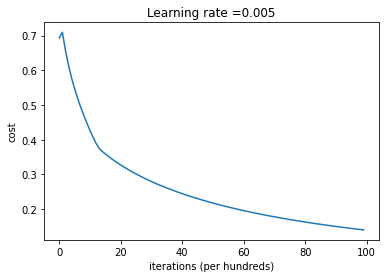

In [40]:
costs = np.squeeze(c['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 71.29186602870814 %
test accuracy: 34.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 74.16267942583733 %
test accuracy: 34.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 66.02870813397129 %
test accuracy: 34.0 %

-------------------------------------------------------



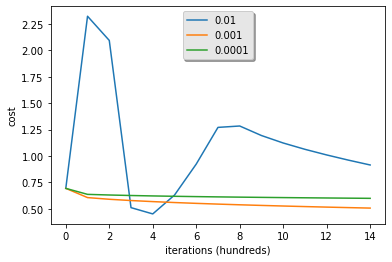

In [41]:


learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()



In [ ]:


#old scipy version

import imageio
import scipy.misc
my_image = "dog.jpg"
from PIL import Image


fname =  my_image
image = np.array(imageio.imread(fname, as_gray=True))
image = image/255.
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")



In [88]:
import imageio
img="cat.jpg"
img1=np.array(imageio.imread(img, as_gray=True))
img2=img1/255

In [89]:
img2.size, img2.shape

(1039857, (879, 1183))

In [90]:
img3=np.resize(img2,(num_px,num_px*3)).reshape(1,num_px*num_px*3).T
img3.size, img3.shape

(12288, (12288, 1))

y = 0, your algorithm predicts a "non-cat" picture.


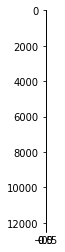

In [91]:
my_predicted_image = predict(d["w"], d["b"],img3)

plt.imshow(img3)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

In [ ]:
image

array([[158.034, 158.034, 158.034, ..., 164.91 , 164.91 , 164.91 ],
       [158.034, 158.034, 158.034, ..., 164.91 , 164.91 , 164.91 ],
       [158.034, 158.034, 157.034, ..., 164.91 , 164.91 , 164.91 ],
       ...,
       [115.388, 118.1  , 121.214, ..., 123.855, 123.838, 124.066],
       [115.872, 115.1  , 116.214, ..., 119.855, 123.311, 127.066],
       [115.872, 115.1  , 115.812, ..., 119.855, 122.311, 125.838]],
      dtype=float32)

In [ ]:
my_image0

In [ ]:
import imageio
import numpy
import scipy.misc
my_image = "dog.jpg"
from PIL import Image
#numpy.array(Image.fromarray(arr).resize())

fname =  my_image
image = np.array(imageio.imread(fname, as_gray=True))
image = image/255.
scipy.misc.reshape((1, num_px*num_px*3)).T
my_image = numpy.array(image).resize(num_px,num_px)
#.reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")



AttributeError: ignored